In [ ]:
from utils import prepare_image_forgery_dataset

data_directory = '../data'

IMG_SIZE=(128, 128)

images, _, labels, _ = prepare_image_forgery_dataset(total_number=20, test_size=0.2, random_state=42, 
                                                                 data_directory=data_directory, img_size=IMG_SIZE)

In [ ]:
from utils import display_images

classnames = ['Auténtica', 'Editada']

display_images(images, labels, classnames=classnames, figsize=(10, 10))

In [ ]:
import os
from PIL import Image
import numpy as np

# Directorio donde se encuentran las imágenes
dir_editadas = "../data/CASIA2/Tp2"
dir_autenticas = "../data/CASIA2/Au"

def obtener_estadisticas(directorio):
    tamanos = []
    resoluciones = []
    
    for imagen in os.listdir(directorio):
        if not imagen.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
            continue
        ruta_imagen = os.path.join(directorio, imagen)
        with Image.open(ruta_imagen) as img:
            # Obtener tamaño en KB
            tamano = os.path.getsize(ruta_imagen) / 1024
            tamanos.append(tamano)
            
            # Obtener resolución
            ancho, alto = img.size
            resoluciones.append((ancho, alto))
    
    return tamanos, resoluciones

# Obtener estadísticas
tamanos_editadas, resoluciones_editadas = obtener_estadisticas(dir_editadas)
tamanos_autenticas, resoluciones_autenticas = obtener_estadisticas(dir_autenticas)

# Calcular estadísticas
num_editadas = len(tamanos_editadas)
num_autenticas = len(tamanos_autenticas)
total_imagenes = num_editadas + num_autenticas

todos_los_tamaños = tamanos_editadas + tamanos_autenticas
tamano_promedio = np.mean(todos_los_tamaños)

todas_resoluciones = resoluciones_editadas + resoluciones_autenticas
resolucion_promedio = np.mean(todas_resoluciones, axis=0)

# Imprimir resultados
print(f"Total de Imágenes: {total_imagenes}")
print(f"Imágenes Editadas: {num_editadas}")
print(f"Imágenes Auténticas: {num_autenticas}")
print(f"Tamaño Promedio de Imágenes: {tamano_promedio:.2f} KB")
print(f"Resolución Promedio: {resolucion_promedio[0]:.0f}x{resolucion_promedio[1]:.0f}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los datos
data = {
    'Característica del Dataset': [
        'Total de Imágenes',
        'Imágenes Editadas',
        'Imágenes Auténticas',
        'Tamaño Promedio de Imágenes',
        'Resolución Promedio'
    ],
    'Valor': [
        f"{total_imagenes:,}",
        f"{num_editadas:,}",
        f"{num_autenticas:,}",
        f"{tamano_promedio:.2f} KB",
        f"{resolucion_promedio[0]:.0f}x{resolucion_promedio[1]:.0f}"
    ]
}

df = pd.DataFrame(data)

# Configurar el estilo de la tabla
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Crear la tabla
tabla = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=['#f0f0f0']*2)

# Ajustar el tamaño de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.5)

# Eliminar los ejes
plt.axis('off')

# # Añadir un título
# plt.title('Estadísticas del Dataset CASIA 2', fontsize=16, fontweight='bold', y=1.05)

# Ajustar el diseño
plt.tight_layout()

# Guardar la imagen (opcional)
plt.savefig('dataset/estadisticas_dataset.png', dpi=300, bbox_inches='tight')

# Mostrar la tabla
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn para un aspecto más moderno
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))

categorias = ['Editadas', 'Auténticas']
cantidad = [num_editadas, num_autenticas]
colores = ['#3498db', '#2ecc71']  # Azul y verde más atractivos

# Crear el gráfico de barras
bars = plt.bar(categorias, cantidad, color=colores, width=0.6)

# Añadir etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', fontweight='bold')

# Personalizar el gráfico
plt.xlabel('Categorías', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Imágenes', fontsize=12, fontweight='bold')
plt.title('Distribución de las Imágenes \n en el Dataset CASIA V2', fontsize=16, fontweight='bold')

# Ajustar los límites del eje y para dar un poco de espacio arriba
plt.ylim(0, max(cantidad) * 1.1)

# Eliminar los bordes superiores y derechos del gráfico
sns.despine(top=True, right=True)

# Mostrar el gráfico
plt.tight_layout()

# Guardar la imagen (opcional)
plt.savefig('dataset/images_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(todos_los_tamaños, bins=20, color='purple')
plt.xlabel('Tamaño de Imágenes (KB)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tamaños de Imágenes en el Dataset CASIA 2')

# Guardar la imagen (opcional)
plt.savefig('dataset/size_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Gráfico de Dispersión
import matplotlib.pyplot as plt

ancho = [res[0] for res in todas_resoluciones]
alto = [res[1] for res in todas_resoluciones]

plt.scatter(ancho, alto, alpha=0.5)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.title('Resolución de Imágenes en el Dataset CASIA 2')

# Guardar la imagen (opcional)
plt.savefig('dataset/resolution_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from tensorflow.keras.optimizers import Adam

def plot_model_architecture(model):
    layers = [
        ('Input', model.input_shape[1:]),
        ('Conv2D', (32, 3, 3)),
        ('Conv2D', (32, 3, 3)),
        ('Conv2D', (32, 3, 3)),
        ('MaxPooling2D', (2, 2)),
        ('Flatten', None),
        ('Dense', 256),
        ('Dense', 2)
    ]

    fig, ax = plt.subplots(figsize=(12, 8))
    
    y_positions = np.arange(len(layers)) * 0.8
    ax.set_ylim(-0.5, max(y_positions) + 0.5)

    for i, (layer_type, layer_info) in enumerate(layers):
        if layer_type == 'Input':
            color = 'lightblue'
            label = f'Input\n{layer_info}'
        elif layer_type == 'Conv2D':
            color = 'lightgreen'
            label = f'Conv2D\n{layer_info[0]} filters\n{layer_info[1]}x{layer_info[2]} kernel'
        elif layer_type == 'MaxPooling2D':
            color = 'lightyellow'
            label = f'MaxPooling2D\n{layer_info[0]}x{layer_info[1]} pool'
        elif layer_type == 'Flatten':
            color = 'lightpink'
            label = 'Flatten'
        elif layer_type == 'Dense':
            color = 'lightcoral'
            label = f'Dense\n{layer_info} units'
        
        ax.add_patch(plt.Rectangle((0.1, y_positions[i] - 0.3), 0.8, 0.6, fill=True, facecolor=color))
        ax.text(0.5, y_positions[i], label, ha='center', va='center', wrap=True)
        
        if i < len(layers) - 1:
            ax.arrow(0.5, y_positions[i] + 0.35, 0, 0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')

    ax.set_xlim(0, 1)
    ax.axis('off')
    plt.title('Model Architecture', fontsize=16)
    plt.tight_layout()
    plt.savefig('model_architecture.png', dpi=300, bbox_inches='tight')
    plt.show()

# Asumiendo que ya tienes definido tu modelo
img_shape = (128, 128, 1)  # Ajusta esto a tu tamaño de imagen real
learning_rate = 0.0001

model = Sequential([
    Input(shape=img_shape),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy',
              metrics=['accuracy'])

# Crear la imagen
plot_model_architecture(model)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def create_svm_model_diagram():
    G = nx.DiGraph()
    
    # Definir nodos
    nodes = [
        ("Input Image", 0),
        ("Preprocessing", 1),
        ("Feature Extraction", 2),
        ("Fourier Transform", 3),
        ("Noise Features", 4),
        ("Edge Detection", 5),
        ("Texture Analysis", 6),
        ("Image Segmentation", 7),
        ("Feature Vector", 8),
        ("SVM Classifier", 9),
        ("Forgery Prediction", 10)
    ]
    
    G.add_nodes_from([node for node, _ in nodes])
    
    # Definir conexiones
    edges = [
        ("Input Image", "Preprocessing"),
        ("Preprocessing", "Feature Extraction"),
        ("Feature Extraction", "Fourier Transform"),
        ("Feature Extraction", "Noise Features"),
        ("Feature Extraction", "Edge Detection"),
        ("Feature Extraction", "Texture Analysis"),
        ("Feature Extraction", "Image Segmentation"),
        ("Fourier Transform", "Feature Vector"),
        ("Noise Features", "Feature Vector"),
        ("Edge Detection", "Feature Vector"),
        ("Texture Analysis", "Feature Vector"),
        ("Image Segmentation", "Feature Vector"),
        ("Feature Vector", "SVM Classifier"),
        ("SVM Classifier", "Forgery Prediction")
    ]
    
    G.add_edges_from(edges)
    
    # Configurar posiciones
    pos = {}
    feature_nodes = ["Fourier Transform", "Noise Features", "Edge Detection", "Texture Analysis", "Image Segmentation"]
    for node, level in nodes:
        if node in feature_nodes:
            pos[node] = (1, -level * 0.8 + 1)
        elif node == "Feature Vector":
            pos[node] = (2, -5)
        elif node in ["SVM Classifier", "Forgery Prediction"]:
            pos[node] = (1, -level * 0.8 + 1)
        else:
            pos[node] = (0, -level * 0.8)
    
    # Dibujar el gráfico
    plt.figure(figsize=(10, 12))
    
    # Dibujar bordes
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20, connectionstyle="arc3,rad=0.1")
    
    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=4000, alpha=0.8)
    
    # Dibujar etiquetas
    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

    plt.title("SVM Image Forgery Detector Workflow", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('svm_forgery_detector_workflow.png', dpi=300, bbox_inches='tight')
    plt.show()

# Crear el diagrama
create_svm_model_diagram()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def add_layer(ax, y, height, name, color, width=0.8):
    ax.add_patch(plt.Rectangle((0.1, y), width, height, fill=True, facecolor=color, edgecolor='black', linewidth=1))
    ax.text(0.5, y + height/2, name, ha='center', va='center', fontweight='bold', fontsize=9, wrap=True)

def create_transfer_learning_model_diagram():
    fig, ax = plt.subplots(figsize=(12, 14))
    
    layers = [
        ("Input Image\n(160, 160, 3)", 'lightblue'),
        ("Data Augmentation", 'lightyellow'),
        ("Preprocessing", 'lightyellow'),
        ("MobileNetV2\n(Pre-trained)", 'lightgreen'),
        ("Global Average Pooling", 'lightcoral'),
        ("Dropout", 'lightpink'),
        ("Dense Layer", 'lightblue'),
        ("Output\n(Forgery Prediction)", 'lightgray')
    ]
    
    y_positions = np.arange(len(layers)) * 0.8
    ax.set_ylim(-0.5, max(y_positions) + 0.5)

    for i, (name, color) in enumerate(layers):
        if name == "MobileNetV2\n(Pre-trained)":
            height = 0.8
        else:
            height = 0.6
        
        y = y_positions[i] - height/2
        add_layer(ax, y, height, name, color)
        
        if i < len(layers) - 1:
            ax.arrow(0.5, y_positions[i] + height/2 + 0.05, 0, 0.3, 
                     head_width=0.05, head_length=0.1, fc='k', ec='k')

    # Añadir anotaciones para Transfer Learning y Fine-tuning
    ax.text(1.05, y_positions[3], "Transfer Learning:\nPre-trained weights\nfrom ImageNet", 
            fontsize=9, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))
    ax.text(1.05, y_positions[5], "Fine-tuning:\nUnfreeze and retrain\nlast layers", 
            fontsize=9, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))
    
    ax.set_xlim(0, 1.5)
    ax.axis('off')
    
    plt.title("Transfer Learning Image Forgery Detector", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('transfer_learning_forgery_detector_layers.png', dpi=300, bbox_inches='tight')
    plt.show()

# Crear el diagrama
create_transfer_learning_model_diagram()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def add_layer(ax, y, height, name, color, width=0.8):
    ax.add_patch(plt.Rectangle((0.1, y), width, height, fill=True, facecolor=color, edgecolor='black', linewidth=1))
    ax.text(0.5, y + height/2, name, ha='center', va='center', fontweight='bold', fontsize=8, wrap=True)

def add_skip_connection(ax, start, end):
    ax.plot([0.95, 1.05, 1.05, 0.95], [start, start, end, end], 'k-', linewidth=1)

def create_unet_model_diagram():
    fig, ax = plt.subplots(figsize=(14, 16))
    
    layers = [
        ("Input (128x128x3)", 'lightblue'),
        ("Conv 32", 'lightgreen'),
        ("Conv 32", 'lightgreen'),
        ("MaxPool", 'lightyellow'),
        ("Conv 64", 'lightgreen'),
        ("Conv 64", 'lightgreen'),
        ("MaxPool", 'lightyellow'),
        ("Conv 128", 'lightgreen'),
        ("Conv 128", 'lightgreen'),
        ("MaxPool", 'lightyellow'),
        ("Conv 256", 'lightgreen'),
        ("Conv 256", 'lightgreen'),
        ("MaxPool", 'lightyellow'),
        ("Conv 512", 'lightgreen'),
        ("Conv 512", 'lightgreen'),
        ("Dropout", 'lightpink'),
        ("UpSampling", 'lightyellow'),
        ("Conv 256", 'lightgreen'),
        ("Conv 256", 'lightgreen'),
        ("UpSampling", 'lightyellow'),
        ("Conv 128", 'lightgreen'),
        ("Conv 128", 'lightgreen'),
        ("UpSampling", 'lightyellow'),
        ("Conv 64", 'lightgreen'),
        ("Conv 64", 'lightgreen'),
        ("UpSampling", 'lightyellow'),
        ("Conv 32", 'lightgreen'),
        ("Conv 32", 'lightgreen'),
        ("Global Average Pooling", 'lightcoral'),
        ("Dense 64", 'lightblue'),
        ("Dense 32", 'lightblue'),
        ("Dense 2 (Softmax)", 'lightgray')
    ]
    
    total_height = 15  # Total height for all layers
    layer_height = total_height / len(layers)
    
    for i, (name, color) in enumerate(layers):
        y = total_height - (i + 1) * layer_height
        add_layer(ax, y, layer_height * 0.8, name, color)
    
    # Add skip connections
    skip_connections = [(1, 26), (4, 23), (7, 20), (10, 17)]
    for start, end in skip_connections:
        y_start = total_height - (start + 1) * layer_height
        y_end = total_height - (end + 1) * layer_height
        add_skip_connection(ax, y_start + layer_height * 0.4, y_end + layer_height * 0.4)
    
    ax.set_xlim(0, 1.2)
    ax.set_ylim(0, total_height)
    ax.axis('off')
    
    plt.title("Modelo U-Net modificado para clasificación", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('modified_unet_model.png', dpi=300, bbox_inches='tight')
    plt.show()

# Crear el diagrama
create_unet_model_diagram()

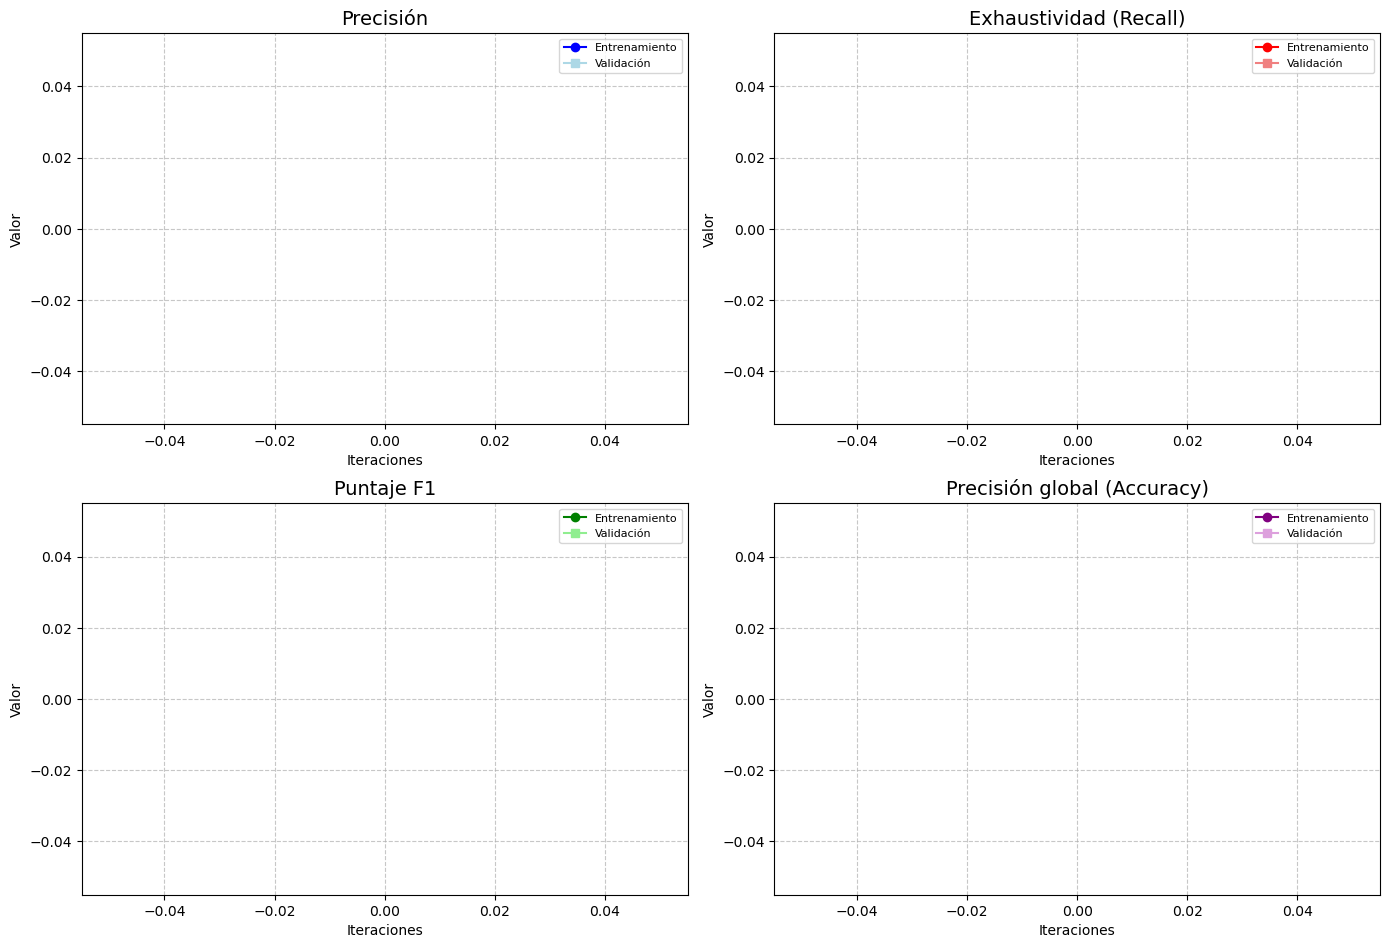

In [1]:
import matplotlib.pyplot as plt

# Datos de las métricas por iteración (entrenamiento)
iterations = []
precision_train = []
recall_train = []
f1_score_train = []
accuracy_train = []

# Datos de las métricas por iteración (validación)
precision_val = []
recall_val = []
f1_score_val = []
accuracy_val = []

# Crear la gráfica
plt.figure(figsize=(14, 10))

# Gráfica de Precisión
plt.subplot(2, 2, 1)
plt.plot(iterations, precision_train, marker='o', label='Entrenamiento', color='blue')
plt.plot(iterations, precision_val, marker='s', label='Validación', color='lightblue')
plt.title('Precisión', fontsize=14)
plt.xlabel('Iteraciones', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfica de Exhaustividad (Recall)
plt.subplot(2, 2, 2)
plt.plot(iterations, recall_train, marker='o', label='Entrenamiento', color='red')
plt.plot(iterations, recall_val, marker='s', label='Validación', color='lightcoral')
plt.title('Exhaustividad (Recall)', fontsize=14)
plt.xlabel('Iteraciones', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfica de Puntaje F1
plt.subplot(2, 2, 3)
plt.plot(iterations, f1_score_train, marker='o', label='Entrenamiento', color='green')
plt.plot(iterations, f1_score_val, marker='s', label='Validación', color='lightgreen')
plt.title('Puntaje F1', fontsize=14)
plt.xlabel('Iteraciones', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfica de Precisión global (Accuracy)
plt.subplot(2, 2, 4)
plt.plot(iterations, accuracy_train, marker='o', label='Entrenamiento', color='purple')
plt.plot(iterations, accuracy_val, marker='s', label='Validación', color='plum')
plt.title('Precisión global (Accuracy)', fontsize=14)
plt.xlabel('Iteraciones', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
# plt.suptitle('Rendimiento del Modelo Basado en AdaBoost', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

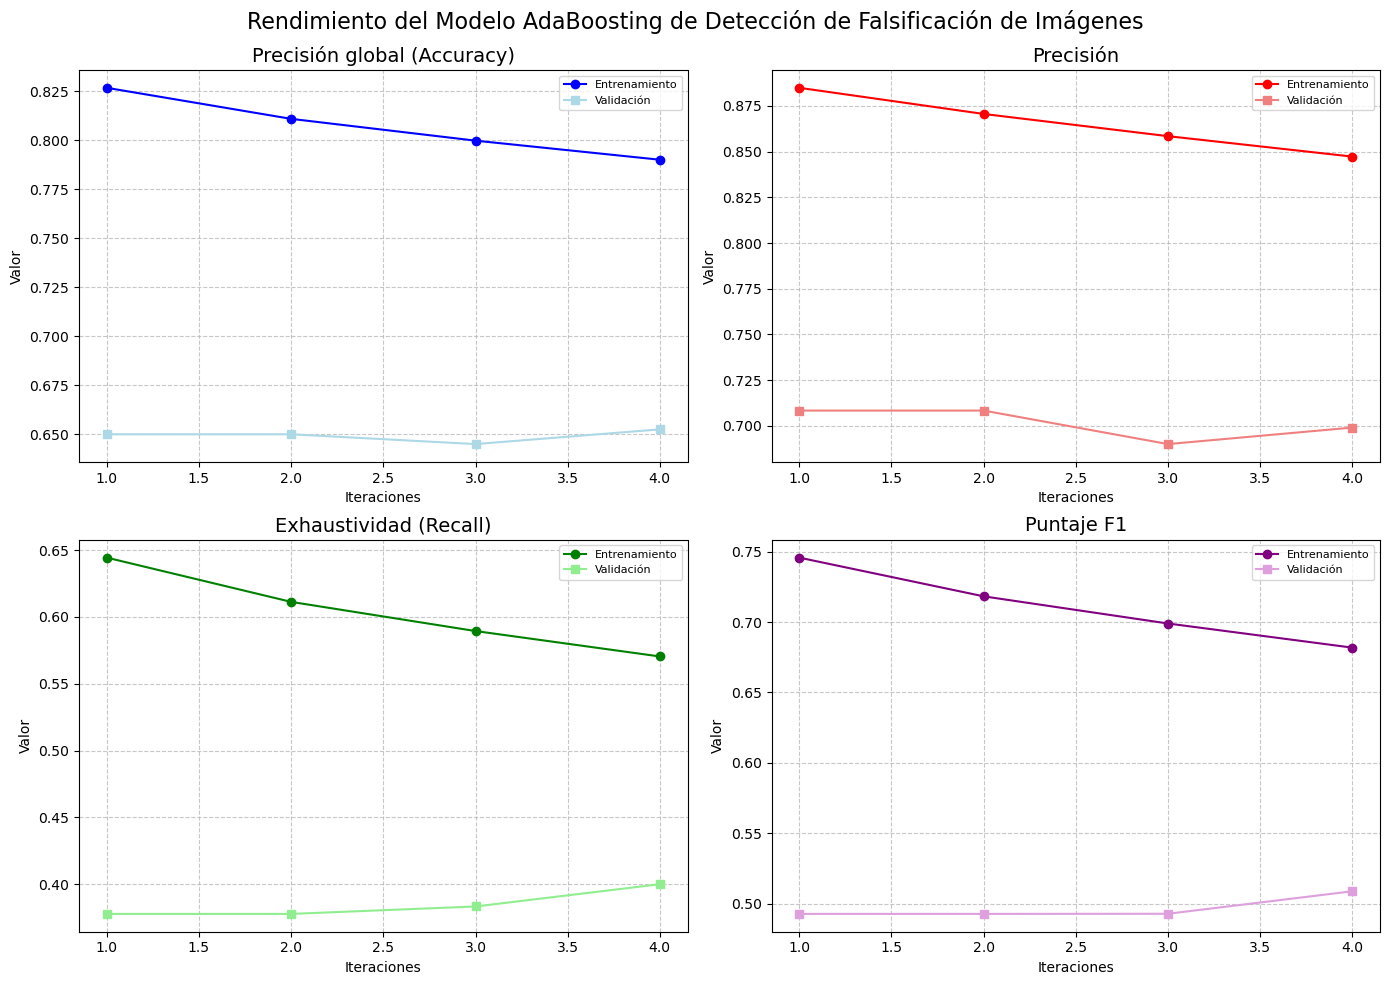

In [1]:
import matplotlib.pyplot as plt

# Datos de las iteraciones
iterations = [1, 2, 3, 4]

# Datos de entrenamiento
accuracy_train = [0.8266666666666667, 0.8108333333333333, 0.7997222222222222, 0.79]
precision_train = [0.8849129593810445, 0.8706118355065195, 0.8584615384615385, 0.8472803347280334]
recall_train = [0.6443661971830986, 0.6112676056338028, 0.5894366197183099, 0.5704225352112676]
f1_score_train = [0.7457212713936431, 0.7182457592056268, 0.6989561586638832, 0.6818181818181819]

# Datos de validación
accuracy_val = [0.65, 0.65, 0.645, 0.6525]
precision_val = [0.7083333333333334, 0.7083333333333334, 0.69, 0.6990291262135923]
recall_val = [0.37777777777777777, 0.37777777777777777, 0.38333333333333336, 0.4]
f1_score_val = [0.49275362318840576, 0.49275362318840576, 0.49285714285714294, 0.508833922261484]

# Crear la gráfica
plt.figure(figsize=(14, 10))

# Gráfica de Precisión global (Accuracy)
plt.subplot(2, 2, 1)
plt.plot(iterations, accuracy_train, marker='o', label='Entrenamiento', color='blue')
plt.plot(iterations, accuracy_val, marker='s', label='Validación', color='lightblue')
plt.title('Precisión global (Accuracy)', fontsize=14)
plt.xlabel('Iteraciones', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfica de Precisión
plt.subplot(2, 2, 2)
plt.plot(iterations, precision_train, marker='o', label='Entrenamiento', color='red')
plt.plot(iterations, precision_val, marker='s', label='Validación', color='lightcoral')
plt.title('Precisión', fontsize=14)
plt.xlabel('Iteraciones', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfica de Exhaustividad (Recall)
plt.subplot(2, 2, 3)
plt.plot(iterations, recall_train, marker='o', label='Entrenamiento', color='green')
plt.plot(iterations, recall_val, marker='s', label='Validación', color='lightgreen')
plt.title('Exhaustividad (Recall)', fontsize=14)
plt.xlabel('Iteraciones', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfica de Puntaje F1
plt.subplot(2, 2, 4)
plt.plot(iterations, f1_score_train, marker='o', label='Entrenamiento', color='purple')
plt.plot(iterations, f1_score_val, marker='s', label='Validación', color='plum')
plt.title('Puntaje F1', fontsize=14)
plt.xlabel('Iteraciones', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.suptitle('Rendimiento del Modelo AdaBoosting de Detección de Falsificación de Imágenes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()